<a href="https://colab.research.google.com/github/dyutivartak/ML-II_Pracs/blob/main/MomentumGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

X = np.array([0.5, 2.5]) 
Y = np.array([0.2, 0.9])

def sigmoid(x, w, b): 
  y_in = np.dot(w, x) + b 
  y_hat = 1/(1 + np.exp(-y_in)) 
  return y_hat

def error(y, y_hat): 
  err = np.array((y-y_hat)**2).mean() 
  return err 

def delta_w(x, y, y_hat, c): 
  dw = c*(y_hat-y)*y_hat*(1-y_hat)*x
  return dw 

def delta_b(y, y_hat, c): 
  db = c*(y_hat-y)*y_hat*(1-y_hat)
  return db

In [6]:
def momentum_gd(X, Y, epochs): 
  w = -2
  b = -2
  eta = 1
  c = 1
  gamma = 0.9
  v_w = 0 
  v_b = 0 
  err_list = [] 
  W = [] 
  B = [] 
  for i in range(epochs): 
    temp_dw = 0
    temp_db = 0 
    for x, y in zip(X, Y):  
      y_hat = sigmoid(x, w, b)
      temp_dw += delta_w(x, y, y_hat, c) 
      temp_db += delta_b(y, y_hat, c) 
    v_w = gamma*v_w + eta*temp_dw 
    v_b = gamma*v_b + eta*temp_db 
    w -= v_w 
    b -= v_b 
    W.append(w) 
    B.append(b) 
    y_hat = sigmoid(X, w, b)
    err_list.append(error(Y, y_hat)) 
    print(f"After epoch {i+1}: Weight is {w} and Bias is {b}") 
  return W, B, err_list

In [ ]:
wt_mom, bias_mom, err_mom = momentum_gd(X, Y, 100)

In [7]:
epoch = [i for i in range(1, 101)]

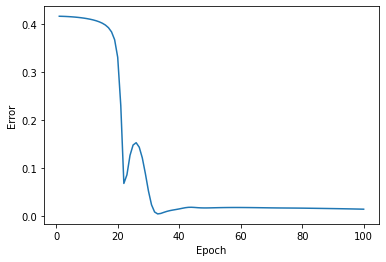

In [9]:
plt.plot(epoch, err_mom) 
plt.xlabel("Epoch") 
plt.ylabel("Error") 
plt.show()

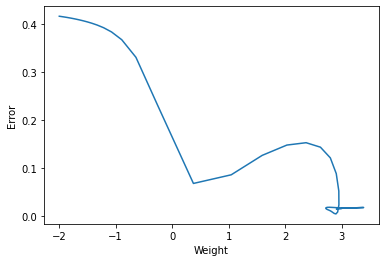

In [10]:
plt.plot(wt_mom, err_mom) 
plt.xlabel("Weight") 
plt.ylabel("Error") 
plt.show()